In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))
warnings.filterwarnings("ignore", category = FutureWarning)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv


In [8]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [12]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

PetID
False    2007
Name: count, dtype: int64

PetType
False    2007
Name: count, dtype: int64

Breed
False    2007
Name: count, dtype: int64

AgeMonths
False    2007
Name: count, dtype: int64

Color
False    2007
Name: count, dtype: int64

Size
False    2007
Name: count, dtype: int64

WeightKg
False    2007
Name: count, dtype: int64

Vaccinated
False    2007
Name: count, dtype: int64

HealthCondition
False    2007
Name: count, dtype: int64

TimeInShelterDays
False    2007
Name: count, dtype: int64

AdoptionFee
False    2007
Name: count, dtype: int64

PreviousOwner
False    2007
Name: count, dtype: int64

AdoptionLikelihood
False    2007
Name: count, dtype: int64



#### No empty values

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PetID,2007.0,1503.000000,579.515315,500.000000,1001.500000,1503.000000,2004.50000,2506.000000
AgeMonths,2007.0,92.279522,52.148363,1.000000,48.000000,94.000000,138.00000,179.000000
WeightKg,2007.0,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,0.701046,0.457914,0.000000,0.000000,1.000000,1.00000,1.000000
HealthCondition,2007.0,0.196313,0.397307,0.000000,0.000000,0.000000,0.00000,1.000000
TimeInShelterDays,2007.0,43.974091,25.740253,1.000000,21.000000,45.000000,66.00000,89.000000
AdoptionFee,2007.0,249.142003,142.887040,0.000000,127.000000,242.000000,375.00000,499.000000
PreviousOwner,2007.0,0.301943,0.459215,0.000000,0.000000,0.000000,1.00000,1.000000
AdoptionLikelihood,2007.0,0.328351,0.469730,0.000000,0.000000,0.000000,1.00000,1.000000


### There is no need for PetID column

In [15]:
df.drop(columns = ["PetID"], axis = 1, inplace = True)
df.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   object 
 1   Breed               2007 non-null   object 
 2   AgeMonths           2007 non-null   int64  
 3   Color               2007 non-null   object 
 4   Size                2007 non-null   object 
 5   WeightKg            2007 non-null   float64
 6   Vaccinated          2007 non-null   int64  
 7   HealthCondition     2007 non-null   int64  
 8   TimeInShelterDays   2007 non-null   int64  
 9   AdoptionFee         2007 non-null   int64  
 10  PreviousOwner       2007 non-null   int64  
 11  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 188.3+ KB


Text(0.5, 1.0, 'Average adoption likelihood by breed')

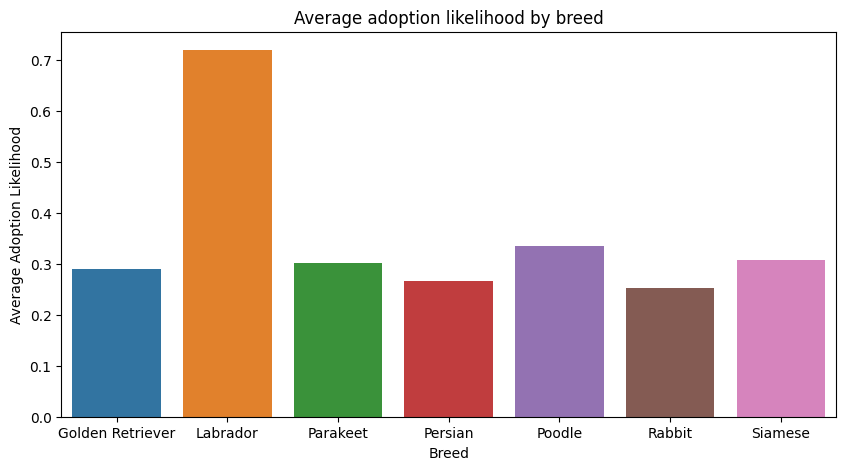

In [25]:
breed_adoption = df.groupby("Breed")["AdoptionLikelihood"].mean().reset_index()
plt.figure(figsize = (10, 5))
sns.barplot(data = breed_adoption, x = "Breed", y = "AdoptionLikelihood")
plt.xlabel("Breed")
plt.ylabel("Average Adoption Likelihood")
plt.title("Average adoption likelihood by breed")

Text(0.5, 1.0, 'Average adoption likelihood by Pet Type')

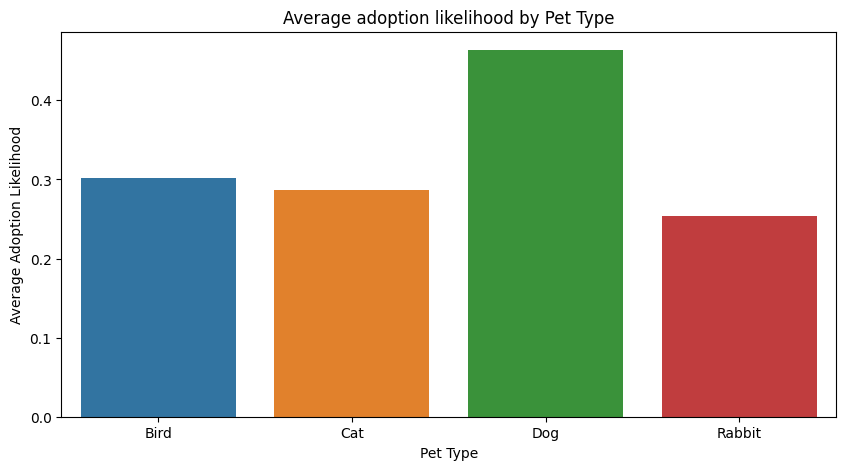

In [27]:
pet_adoption = df.groupby("PetType")["AdoptionLikelihood"].mean().reset_index()
plt.figure(figsize = (10, 5))
sns.barplot(data = pet_adoption, x = "PetType", y = "AdoptionLikelihood")
plt.xlabel("Pet Type")
plt.ylabel("Average Adoption Likelihood")
plt.title("Average adoption likelihood by Pet Type")

<Axes: xlabel='PetType', ylabel='count'>

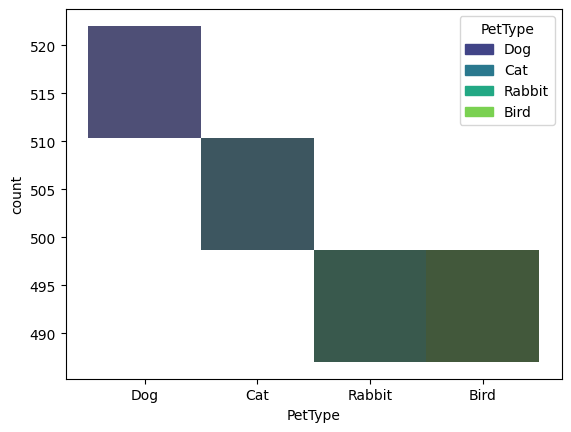

In [38]:
distribution = df["PetType"].value_counts().reset_index()
sns.histplot(data = distribution, x = "PetType", y = "count", palette = "viridis", hue = "PetType")

##### So, there are more dogs in the dataset than cats and rabbits and bird are the last.

#### Can color have an influence on adoption likelihood

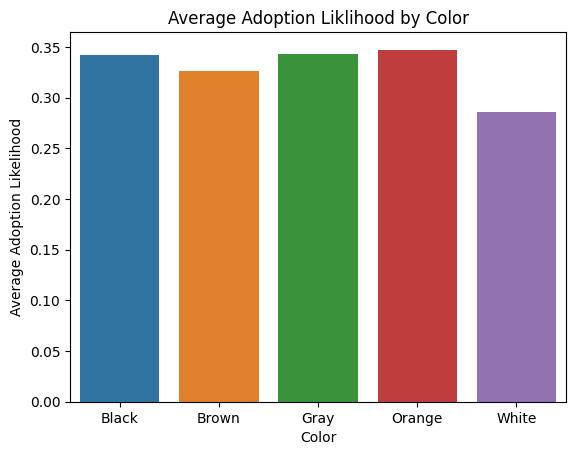

In [42]:
avg_color = df.groupby("Color")["AdoptionLikelihood"].mean().reset_index()
sns.barplot(data = avg_color, x = "Color", y = "AdoptionLikelihood")
plt.xlabel("Color")
plt.ylabel("Average Adoption Likelihood")
plt.title("Average Adoption Liklihood by Color")
plt.show()

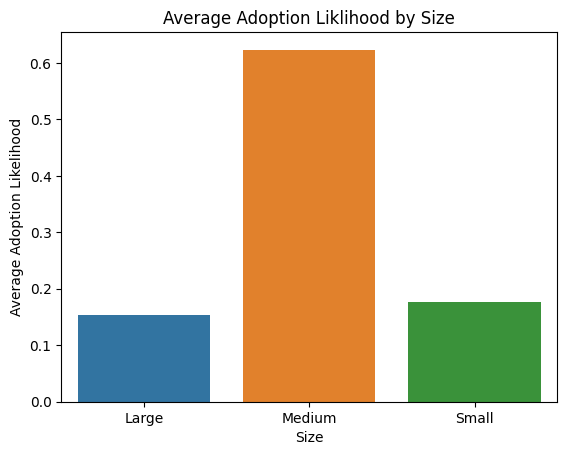

In [43]:
avg_color = df.groupby("Size")["AdoptionLikelihood"].mean().reset_index()
sns.barplot(data = avg_color, x = "Size", y = "AdoptionLikelihood")
plt.xlabel("Size")
plt.ylabel("Average Adoption Likelihood")
plt.title("Average Adoption Liklihood by Size")
plt.show()

#### Medium size pets are more popular. Large pets are least favorable

In [51]:
df1 = df[["Vaccinated", "AdoptionLikelihood"]]
df1["Vaccinated"] = df1.Vaccinated.apply(lambda x: "vaccinated" if x == 1 else "not vaccinated")


/tmp/ipykernel_34/2840021269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Vaccinated"] = df1.Vaccinated.apply(lambda x: "vaccinated" if x == 1 else "not vaccinated")


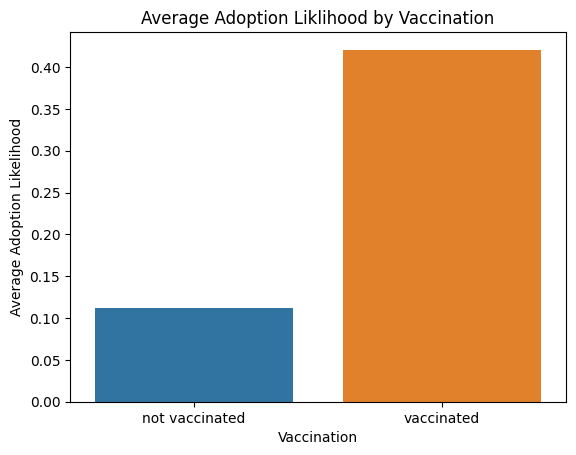

In [54]:
vaccination = df1.groupby("Vaccinated")["AdoptionLikelihood"].mean().reset_index()
sns.barplot(data = vaccination, x = "Vaccinated", y = "AdoptionLikelihood")
plt.xlabel("Vaccination")
plt.ylabel("Average Adoption Likelihood")
plt.title("Average Adoption Liklihood by Vaccination")
plt.show()